# CME538 - Introduction to Data Science
## Lecture 4.1 - Working with Text and Datetimes

### Lecture Structure
1. [Demo 1](#section1)
2. [Demo 2](#section2)
3. [Demo 3](#section3)
4. [Demo 4](#section4)

## Setup Notebook

In [1]:
# Import 3rd party libraries
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

<a id='section1'></a>
## 1. Demo 1 - Ontario Region Data

In [2]:
# Import Region-Population CSV.
region_population = pd.read_csv('region_population.csv')
region_population.head()

,region,population
0,Regional Municipality of Peel,1381739
1,Oxford County,110862
2,Capitale-Nationale,729997
3,Municipality of Chatham-Kent,102042


In [3]:
# Import Region-Province CSV.
region_province = pd.read_csv('region_province.csv')
region_province.head()

,region,province
0,Peel Region,Ontario
1,Oxford,Ontario
2,Capitale Nationale,Quebec
3,Chatham-Kent,Ontario


Write a function to map to a consistent string representation of **Region**.

In [4]:
def canonicalization_region(region):
    return (
        region.lower()
        .replace(' ', '')
        .replace('-', '')
        .replace('county', '')
        .replace('regional', '')
        .replace('region', '')
        .replace('of', '')
        .replace('municipality', '')
    )

Add a new cleaned column for **Region**.

In [5]:
region_population['clean_region'] = region_population['region'].map(canonicalization_region)
region_population.head()

,region,population,clean_region
0,Regional Municipality of Peel,1381739,peel
1,Oxford County,110862,oxford
2,Capitale-Nationale,729997,capitalenationale
3,Municipality of Chatham-Kent,102042,chathamkent


In [6]:
region_province['clean_region'] = region_province['region'].map(canonicalization_region)
region_province.head()

,region,province,clean_region
0,Peel Region,Ontario,peel
1,Oxford,Ontario,oxford
2,Capitale Nationale,Quebec,capitalenationale
3,Chatham-Kent,Ontario,chathamkent


In [7]:
region_population.merge(region_province[['province', 'clean_region']], on='clean_region', how='right')

,region,population,clean_region,province
0,Regional Municipality of Peel,1381739,peel,Ontario
1,Oxford County,110862,oxford,Ontario
2,Capitale-Nationale,729997,capitalenationale,Quebec
3,Municipality of Chatham-Kent,102042,chathamkent,Ontario


<a id='section2'></a>
## 2. Demo 2 - Log Data

Extract the Day, Month, Year, Hour, Minute, Second and Time Zone from log data using Python string methods.

Read the text file.

In [8]:
with open('log.txt', 'r') as f:
    logs = f.read().split('\n')
print(logs)

['169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"', '193.205.203.3 - - [2/Feb/2005:17:23:6 -0800] "GET /stat141/Notes/dim.html HTTP/1.0" 404 302 "http://eeyore.ucdavis.edu/stat141/Notes/session.html"', '169.237.46.240 - "" [3/Feb/2006:10:18:37 -0800] "GET /stat141/homework/Solutions/hw1Sol.pdf HTTP/1.1"']


`logs` is now a list of strings where each string is a log.

We could try simply indexing the strings. It looks like the Year is character 27:31. Let's try extracting the Year.

In [9]:
# Log 1
logs[0][27:31]

'2014'

It worked! Let's try it for the second log.

In [10]:
# Log 2
logs[1][27:31]

'05:1'

We can see that this doesn't generalize. Lets try using Python string methods.

First, let's grab the section of the log we're interested in using the `.split()` method.

In [11]:
text = logs[0].split('[')[1].split(']')[0]
text

'26/Jan/2014:10:47:58 -0800'

We can see that this works for all logs.

In [16]:
for log in logs:
    print(log.split('[')[1].split(']')[0])

26/Jan/2014:10:47:58 -0800
2/Feb/2005:17:23:6 -0800
3/Feb/2006:10:18:37 -0800


Now we can use `.split()` again to get the day and month and remainder.

In [17]:
day, month, remainder = text.split('/')
print('day: {}, month: {}, remainder: {}'.format(day, month, remainder))

day: 26, month: Jan, remainder: 2014:10:47:58 -0800


In [18]:
year, hour, minute, remainder = remainder.split(':')
print('year: {}, hour: {}, minute: {}, remainder: {}'.format(year, hour, minute, remainder))

year: 2014, hour: 10, minute: 47, remainder: 58 -0800


In [19]:
seconds, time_zone = remainder.split(' ')
print('second: {}, time_zone: {}'.format(seconds, time_zone))

second: 58, time_zone: -0800


Now, lets try extracting for each log and savings to a DataFrame.

In [20]:
def log_parser(log):
    text = log.split('[')[1].split(']')[0]
    day, month, remainder = text.split('/')
    year, hour, minute, remainder = remainder.split(':')
    seconds, time_zone = remainder.split(' ')
    return {'day': day, 'month': month, 'year': year, 
            'hour': hour, 'minute': minute, 'seconds': seconds, 
            'time_zone': time_zone}

In [21]:
data = pd.DataFrame([log_parser(log) for log in logs])
data.head()

,day,month,year,hour,minute,seconds,time_zone
0,26,Jan,2014,10,47,58,-0800
1,2,Feb,2005,17,23,6,-0800
2,3,Feb,2006,10,18,37,-0800


Try the same thing using regular expressions.

In [22]:
import re

pattern = r'\[(\d+)/(\w+)/(\d+):(\d+):(\d+):(\d+) (.+)\]'
day, month, year, hour, minute, second, time_zone = re.findall(pattern, logs[0])[0]

print(year, month, day, hour, minute, second, time_zone)

2014 Jan 26 10 47 58 -0800


<a id='section3'></a>
## 3. Demo 3 - DateTime Index

First, let's import Python's built-in Datatime package.

In [23]:
from datetime import datetime

To start, let's generate some variables to hold datetime information.

In [24]:
year = 2020
month = 11
day = 12
hour = 15
minute = 10
second = 32
microsecond = 2304

Now, create a datetime object. Hold shift + tab to see what argurments `datetime()` takes.

In [25]:
date_time = datetime(year=year, month=month, day=day, 
                     hour=hour, minute=minute, second=second, 
                     microsecond=microsecond)
date_time

datetime.datetime(2020, 11, 12, 15, 10, 32, 2304)

The `datetime()` class has many useful methods. Type `date_time.` and press tab.

In [26]:
date_time.year

2020

In [27]:
date_time.hour

15

In [29]:
date_time.weekday()

3

`.weekday()` returns the day of the week as an integer, where Monday is 0 and Sunday is 6. Weekday = 3 is Thursday!

We can also format the datetime object as a string. Visit this [website](https://www.w3schools.com/python/python_datetime.asp) for a reference of all the legal format codes.

**Weekday, short version**

In [30]:
date_time.strftime('%a')

'Thu'

**Weekday, full version**

In [31]:
date_time.strftime('%A')

'Thursday'

**Timezone**

In [32]:
date_time.strftime('%Z')

''

Hmm, this is interesting. Why is there no time zone information?

Remember the `datetime.datetime()` class has a time zone argument which is set to `tzinfo=None` by default.

To make a datetime object have a time zone, you can use the pytz library.

In [35]:
import pytz

First, lets use `pytz` to create a time zone object.

In [36]:
time_zone = pytz.timezone('Canada/Eastern')

Next, we can apply the time zone to our naive datetime.

In [37]:
date_time_aware = time_zone.localize(date_time)
date_time_aware

datetime.datetime(2020, 11, 12, 15, 10, 32, 2304, tzinfo=<DstTzInfo 'Canada/Eastern' EST-1 day, 19:00:00 STD>)

<a id='section4'></a>
## 4. Demo 4 - Datetimes in Pandas

Typically, we deal with time series as a datetime index when working with a Pandas DataFrame. Pandas has a lot of functions and methods to work with time series that you can check out [here](https://pandas.pydata.org/pandas-docs/stable/timeseries.html).

### DatetimeIndex
Let's start by creating a dummy DataFrame. We can use the `pd.date_range()` function to create a Pandas `DatetimeIndex`.

In [38]:
idx = pd.date_range(start='12/31/2020', periods=10, freq='Y')
idx

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In this case, we've created a DatetimeIndex starting at `12/11/2020`, lasting for 10 periods at a frequency of every year.

In [39]:
idx = pd.date_range(start='12/31/2020', periods=10, freq='D')
idx

DatetimeIndex(['2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-09'],
              dtype='datetime64[ns]', freq='D')

This time, we've selected a frequency of one day.

Another option is to convert existing datetime information into a `DatetimeIndex`.

In [40]:
import numpy as np
idx = pd.to_datetime(['November 21, 2020','4/3/19',
                      '10-Feb-2012', None, 10.34])
idx

DatetimeIndex([          '2020-11-21 00:00:00',
                         '2019-04-03 00:00:00',
                         '2012-02-10 00:00:00',
                                         'NaT',
               '1970-01-01 00:00:00.000000010'],
              dtype='datetime64[ns]', freq=None)

Question: Why did `10.34` successfully convert to a datetime?

Ok, let's create a DataFrame.

In [41]:
idx = pd.date_range(start='12/11/2020', periods=1000, freq='D')
idx

DatetimeIndex(['2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
               '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18',
               '2020-12-19', '2020-12-20',
               ...
               '2023-08-28', '2023-08-29', '2023-08-30', '2023-08-31',
               '2023-09-01', '2023-09-02', '2023-09-03', '2023-09-04',
               '2023-09-05', '2023-09-06'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [42]:
data = pd.DataFrame(index=idx, 
                    data=np.random.rand(1000, 2), 
                    columns=['Var1', 'Var2'])
data.head()

,Var1,Var2
2020-12-11,0.135570,0.584610
2020-12-12,0.707243,0.574941
2020-12-13,0.789415,0.780791
2020-12-14,0.264421,0.518208
2020-12-15,0.911058,0.704742


Now we can use Pandas index operations.

In [43]:
data.index.min()

Timestamp('2020-12-11 00:00:00', freq='D')

In [44]:
data.index.max()

Timestamp('2023-09-06 00:00:00', freq='D')

### Time Resampling

Next, we'll explore Pandas `.resample()` method.

Let's import the Uber ride data from Lecture 3.1.

In [45]:
# Import data
uber_data = pd.read_csv('uber-raw-data-jun14.csv')
uber_data.head()

,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512


In [46]:
# Set 'Date/Time' column as index
uber_data = uber_data.set_index('Date/Time')
uber_data.head()

,Lat,Lon,Base
Date/Time,,,
6/1/2014 0:00:00,40.7293,-73.9920,B02512
6/1/2014 0:01:00,40.7131,-74.0097,B02512
6/1/2014 0:04:00,40.3461,-74.6610,B02512
6/1/2014 0:04:00,40.7555,-73.9833,B02512
6/1/2014 0:07:00,40.6880,-74.1831,B02512


In [48]:
# Convert index to DatetimeIndex
uber_data.index = pd.DatetimeIndex(uber_data.index)
uber_data.head()

,Lat,Lon,Base
Date/Time,,,
2014-06-01 00:00:00,40.7293,-73.9920,B02512
2014-06-01 00:01:00,40.7131,-74.0097,B02512
2014-06-01 00:04:00,40.3461,-74.6610,B02512
2014-06-01 00:04:00,40.7555,-73.9833,B02512
2014-06-01 00:07:00,40.6880,-74.1831,B02512


We know that this DataFrame contains ride data from June 2014.

Let's say we want to generate a plot showing the number of ride's per day in June. We can do this using `.resample()`.

When calling .resample() you need to specify a rule parameter and then you need to call an aggregation function such as count, sum, mean, etc.

The rule parameter describes the frequency to apply the aggregation function (daily, monthly, etc.).

There are many rules as seen [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases) under `Offset aliases`.



In [51]:
# Daily count
counts = uber_data.index.value_counts().resample('D').sum()
counts

2014-06-01    15967
2014-06-02    17503
2014-06-03    22674
2014-06-04    22831
2014-06-05    28371
2014-06-06    24683
2014-06-07    20889
2014-06-08    15749
2014-06-09    23244
2014-06-10    22874
2014-06-11    25716
2014-06-12    29844
2014-06-13    31207
2014-06-14    19327
2014-06-15    14511
2014-06-16    17778
2014-06-17    21807
2014-06-18    24647
2014-06-19    28594
2014-06-20    24271
2014-06-21    19940
2014-06-22    16322
2014-06-23    17735
2014-06-24    20779
2014-06-25    26460
2014-06-26    28516
2014-06-27    24895
2014-06-28    21208
2014-06-29    17107
2014-06-30    18395
Freq: D, Name: Date/Time, dtype: int64

Now, let's try plotting it.

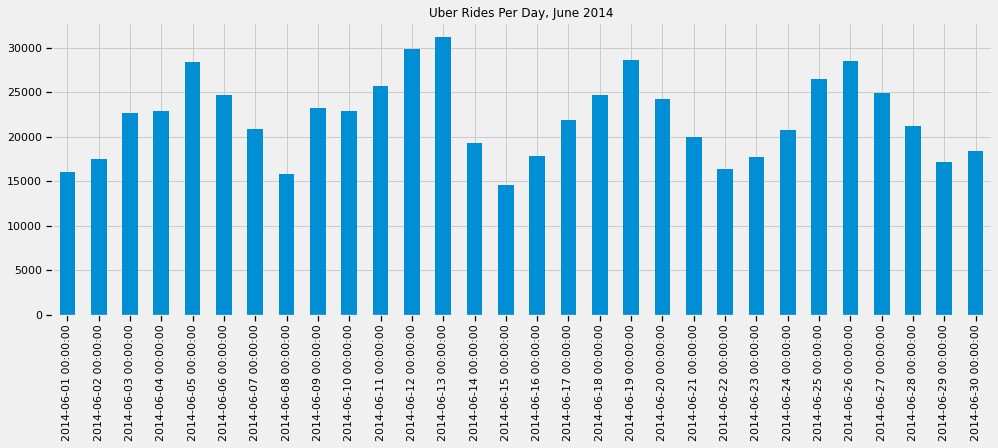

In [52]:
title = 'Uber Rides Per Day, June 2014'
counts.plot.bar(figsize=(15, 5), title=title)
plt.show()

Question: What could be causing the cyclical pattern?